In [2]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

In [3]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="data.csv"
dataframe_envio_portos= pd.read_csv(nome_do_arquivo)

In [ ]:
#apresentando as 5 primeiras linhas do dataset
dataframe_envio_portos.head().T

In [ ]:
dataframe_envio_portos.info() #verificando os tipos de variáveis e se existem ou não valores nulos

In [ ]:
# Funcao para verificar valores missing no dataset
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    return dict_x

# Verificando as colunas com dados missing do dataset
missing = percent_missing(dataframe_envio_portos)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:21]

In [ ]:
#analisando a "estatística" do dataset
dataframe_envio_portos.describe()

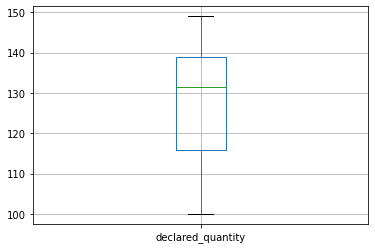

In [4]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_quantity']].boxplot()

In [ ]:
dataframe_envio_portos['declared_quantity'].plot()

In [ ]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_cost']].boxplot()

In [ ]:
dataframe_envio_portos['declared_cost'].plot()

In [ ]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_weight']].boxplot()

In [ ]:
dataframe_envio_portos['declared_weight'].plot()

In [ ]:
#identificando possíveis outliers
dataframe_envio_portos[['actual_weight']].boxplot()

In [ ]:
dataframe_envio_portos['actual_weight'].plot()

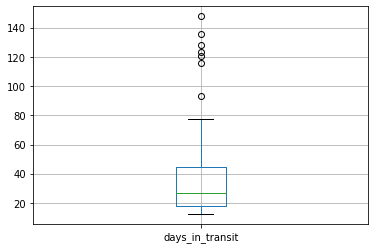

In [5]:
#identificando possíveis outliers
dataframe_envio_portos[['days_in_transit']].boxplot()

In [ ]:
dataframe_envio_portos['days_in_transit'].plot()

In [8]:
#realizando a análise de regressão
x=dataframe_envio_portos['declared_weight'].values  #variável independente 
Y=dataframe_envio_portos['actual_weight'].values #variável dependente

In [9]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [10]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [11]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)

In [12]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [13]:
#parâmetros encontrados
print('Coeficiente angular da regressão linear (a): {}'.format(reg.coef_))
print('Coeficiente linear da regressão linear (b): {:.3f}'.format(reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Coeficiente angular da regressão linear (a): [1.03718115]
Coeficiente linear da regressão linear (b): -5.296
Coeficiente de Determinação (R2): 0.9993288165644932


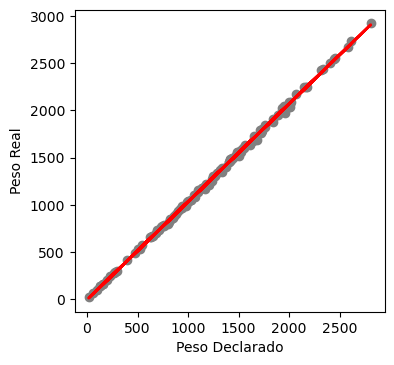

In [14]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()
